In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 117MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 54s 83ms/step - loss: 0.6771 - accuracy: 0.5799 - val_loss: 0.6359 - val_accuracy: 0.6472
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.5678 - accuracy: 0.7066 - val_loss: 0.5060 - val_accuracy: 0.7612
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4292 - accuracy: 0.7986 - val_loss: 0.5257 - val_accuracy: 0.7628
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2768 - accuracy: 0.8818 - val_loss: 0.6386 - val_accuracy: 0.7646
Epoch 5/10
625/625 [==============================] - 61s 96ms/step - loss: 0.1358 - accuracy: 0.9482 - val_loss: 0.9263 - val_accuracy: 0.7606
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0817 - accuracy: 0.9718 - val_loss: 1.0412 - val_accuracy: 0.7754
Epoch 7/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0555 - accuracy: 0.9815 - val_loss: 1.3614 - val_accuracy:

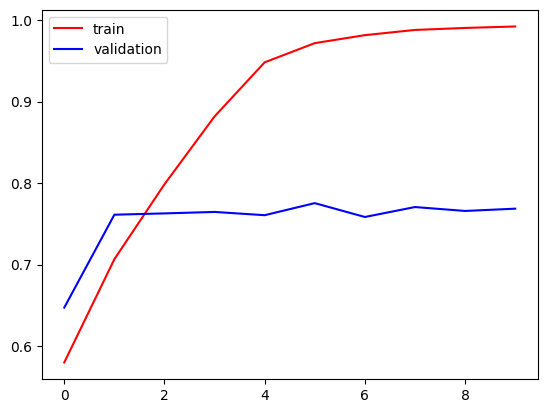

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

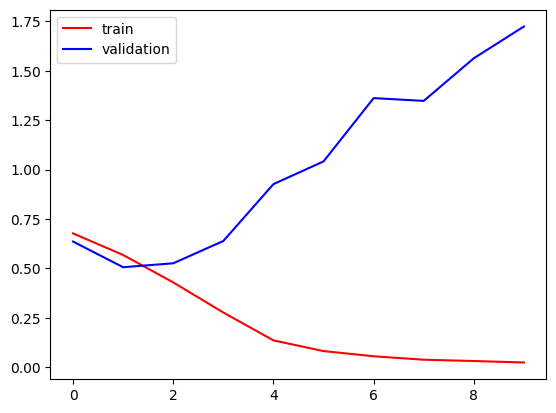

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
# ways to reduce overfitting

# Add more data
# Data Augmentation (create new data by using existing data)
# L1/L2 Regularizer
# Dropout (Dropout layers have been the go-to method to reduce the overfitting of neural networks.)
# Batch Norm
# Reduce complexity

In [25]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.4851 - accuracy: 0.5788 - val_loss: 0.6301 - val_accuracy: 0.6448
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5740 - accuracy: 0.7030 - val_loss: 0.5037 - val_accuracy: 0.7494
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4868 - accuracy: 0.7668 - val_loss: 0.4600 - val_accuracy: 0.7866
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4132 - accuracy: 0.8141 - val_loss: 0.4487 - val_accuracy: 0.7924
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3602 - accuracy: 0.8443 - val_loss: 0.4253 - val_accuracy: 0.8130
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2833 - accuracy: 0.8794 - val_loss: 0.4735 - val_accuracy: 0.8104
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2197 - accuracy: 0.9081 - val_loss: 0.5723 - val_ac

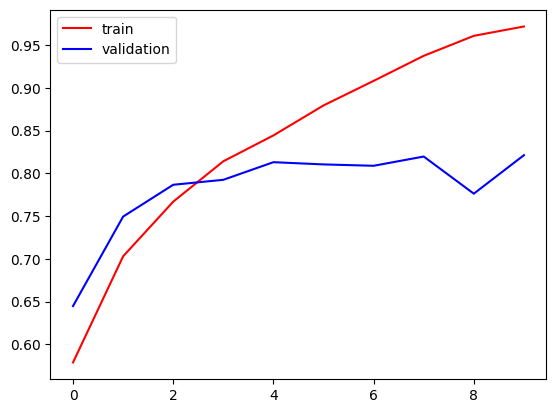

In [30]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

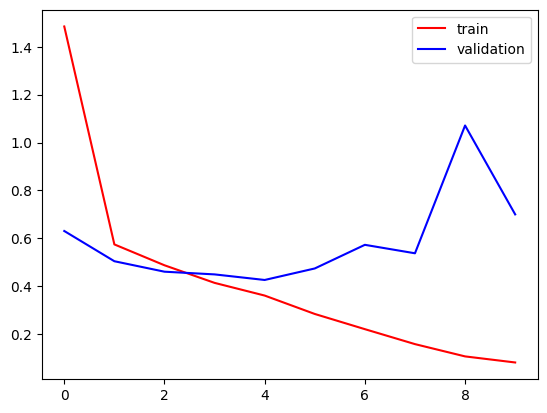

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [47]:
import cv2

In [48]:
test_img = cv2.imread('/content/cat.jpg')

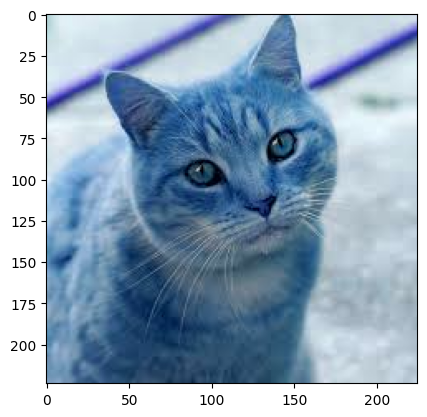

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(224, 225, 3)

In [51]:
test_img = cv2.resize(test_img,(256,256))

In [52]:
test_input = test_img.reshape((1,256,256,3))

In [53]:
model.predict(test_input)

1/1 [==============================] - 0s 29ms/step


array([[0.]], dtype=float32)

In [54]:
test_img = cv2.imread('/content/dog.jpg')

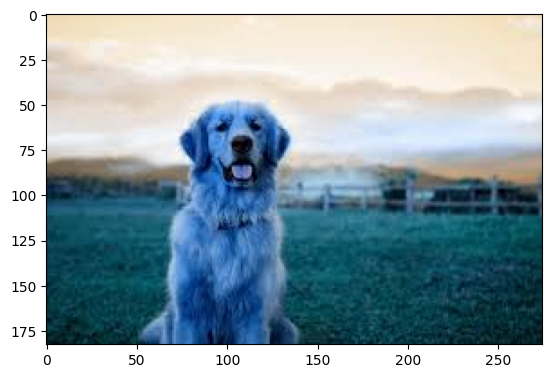

In [55]:
plt.imshow(test_img)

In [56]:
test_img.shape

(183, 275, 3)

In [57]:
test_img = cv2.resize(test_img,(256,256))

In [58]:
test_input = test_img.reshape((1,256,256,3))

In [59]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)